___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
X_train.shape

(60000, 28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [5]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [6]:
X_test.shape[0]

10000

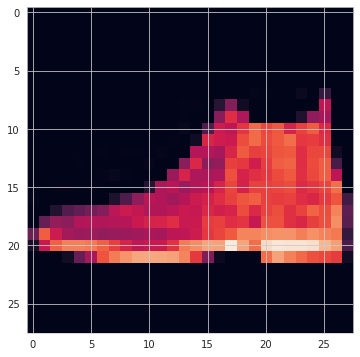

In [7]:
plt.imshow(X_test[0])

In [8]:
import random

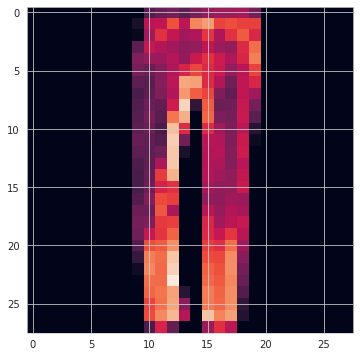

In [9]:
random_img = X_test[random.randrange(0, 10001)]
plt.imshow(random_img)

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [10]:
X_train.max()

255

In [11]:
X_train = X_train/255

In [12]:
X_test = X_test/255

In [13]:
y_test , y_train

(array([9, 2, 1, ..., 8, 1, 5], dtype=uint8),
 array([9, 0, 0, ..., 3, 0, 5], dtype=uint8))

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [14]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [15]:
X_test.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_test, y_test.shape

(array([9, 2, 1, ..., 8, 1, 5], dtype=uint8), (10000,))

In [18]:
set(y_test), set(y_train)

({0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {0, 1, 2, 3, 4, 5, 6, 7, 8, 9})

In [19]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [20]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [21]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [23]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))


model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

**TASK 7: Plot values of metrics you used in your model.**

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 28)        7084      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 28)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 18928)             0         
                                                                 
 dense (Dense)               (None, 128)               2

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_accuracy', mode="max", patience=3, restore_best_weights = True)

In [27]:
model.fit(X_train, Y_train, batch_size=50, epochs=100, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/100
1200/1200 [==============================] - 15s 8ms/step - loss: 0.4785 - accuracy: 0.8325 - val_loss: 0.3145 - val_accuracy: 0.8835
Epoch 2/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.3185 - accuracy: 0.8904 - val_loss: 0.2926 - val_accuracy: 0.8981
Epoch 3/100
1200/1200 [==============================] - 7s 6ms/step - loss: 0.2927 - accuracy: 0.8998 - val_loss: 0.2877 - val_accuracy: 0.9032
Epoch 4/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2884 - accuracy: 0.9049 - val_loss: 0.2801 - val_accuracy: 0.9049
Epoch 5/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2844 - accuracy: 0.9056 - val_loss: 0.3235 - val_accuracy: 0.9012
Epoch 6/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2786 - accuracy: 0.9071 - val_loss: 0.3384 - val_accuracy: 0.9009
Epoch 7/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2756 - accuracy: 0.9078 - val_loss: 0.2734 - val_a

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [28]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.478,0.832,0.314,0.883
1,0.318,0.890,0.293,0.898
2,0.293,0.900,0.288,0.903
3,0.288,0.905,0.280,0.905
4,0.284,0.906,0.323,0.901
5,0.279,0.907,0.338,0.901
6,0.276,0.908,0.273,0.907
7,0.272,0.911,0.281,0.907
8,0.275,0.910,0.275,0.906
9,0.275,0.910,0.285,0.902


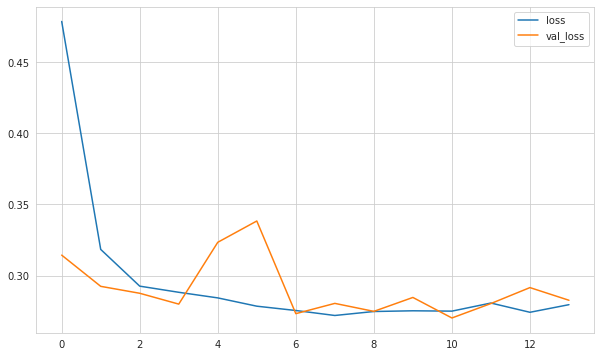

In [29]:
summary[["loss", "val_loss"]].plot();

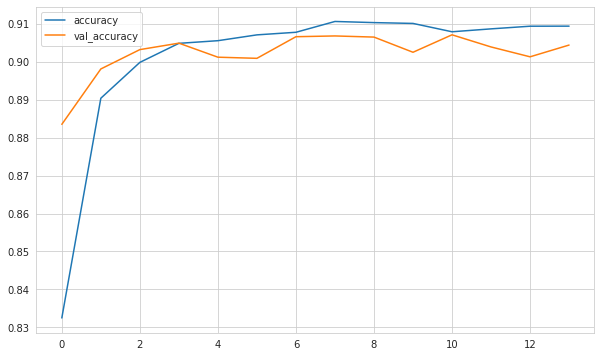

In [30]:
summary[["accuracy", "val_accuracy"]].plot();

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
pred_prob = model.predict(X_test)

In [33]:
y_pred = np.argmax(pred_prob, axis=1)

In [34]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.81      0.89      0.85      1000
           3       0.88      0.93      0.90      1000
           4       0.86      0.84      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.78      0.69      0.73      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Prediction

In [35]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [36]:
model.save('cloth_predict.h5')

In [37]:
model = load_model('cloth_predict.h5')

In [38]:
X_test[459].shape

(28, 28, 1)

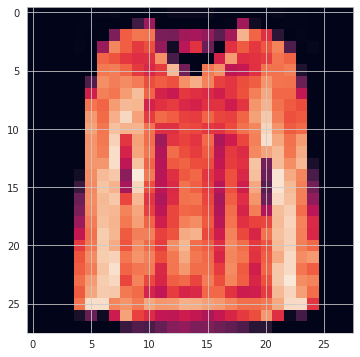

In [39]:
plt.imshow(X_test[459].reshape(28, 28));

In [40]:
my_image = np.expand_dims(X_test[459], axis=0)
my_image.shape

(1, 28, 28, 1)

In [41]:
np.argmax(model.predict(my_image))

6

In [42]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [53]:
def pred_and_show_img (model, img_number):

  """
  shows the class list, predicted image and the model prediction result
  """

  plt.imshow(X_test[img_number].reshape(28, 28))

  my_image = np.expand_dims(X_test[img_number], axis=0)
  
  prediction = np.argmax(model.predict(my_image))
  print("Our model predicted this image in the" , classes[prediction], "class")
 
  

Our model predicted this image in the Trouser class


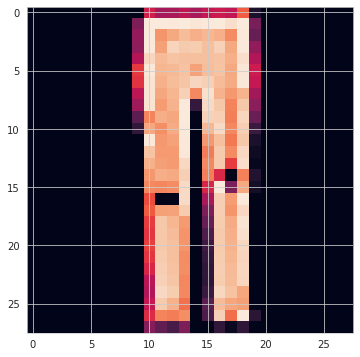

In [54]:
pred_and_show_img(model, 398)

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___